In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from os.path import dirname, join, abspath
import sys


#from zfa.core.default_dirs import INTER_ANIMAL_RESULTS_DIR ,INTER_ANIMAL_RESULTS_DIR_2
BASE_ROOT = "/data/user_data/rdkeller/"
BASE_DIR = os.path.join(BASE_ROOT, "zfa/")
INTER_ANIMAL_RESULTS_DIR = os.path.join(BASE_DIR, "inter_animal_results/")
sys.path.insert(0, abspath(join(dirname("percentile_processing.py"), '..')))
from scripts.python_scripts.percentile_processing import extract_file_paths, group_dictionaries, get_consistencies



In [3]:
INTER_ANIMAL_RESULTS_DIR

'/data/user_data/rdkeller/zfa/inter_animal_results/'

In [4]:
# Test the function
directory_path = INTER_ANIMAL_RESULTS_DIR  # replace with your directory path
file_dicts = extract_file_paths(directory_path)
for dictionary in file_dicts:
    print(dictionary)


{'source_cell_type': 'glial', 'target_cell_type': 'glial', 'job_ID': 5, 'source_animal': 4, 'target_animal': 0, 'filename': 'source_cell_type=glial_target_cell_type=glial_jobID=5_source_animal=4_target_animal=0_inter-animal-consistency.pickle'}
{'source_cell_type': 'glial', 'target_cell_type': 'glial', 'job_ID': 21, 'source_animal': 5, 'target_animal': 0, 'filename': 'source_cell_type=glial_target_cell_type=glial_jobID=21_source_animal=5_target_animal=0_inter-animal-consistency.pickle'}
{'source_cell_type': 'glial', 'target_cell_type': 'glial', 'job_ID': 20, 'source_animal': 2, 'target_animal': 0, 'filename': 'source_cell_type=glial_target_cell_type=glial_jobID=20_source_animal=2_target_animal=0_inter-animal-consistency.pickle'}
{'source_cell_type': 'glial', 'target_cell_type': 'glial', 'job_ID': 7, 'source_animal': 7, 'target_animal': 0, 'filename': 'source_cell_type=glial_target_cell_type=glial_jobID=7_source_animal=7_target_animal=0_inter-animal-consistency.pickle'}
{'source_cell_ty

In [5]:
len(file_dicts)

200

In [6]:
grouped_dicts = group_dictionaries(file_dicts)

key_list = list(grouped_dicts.keys())
grouped_dicts.keys()

dict_keys([('glial', 'glial', 2, 0), ('glial', 'glial', 2, 1), ('glial', 'glial', 3, 1), ('glial', 'glial', 4, 0), ('glial', 'glial', 5, 0), ('glial', 'glial', 5, 1), ('glial', 'glial', 6, 1), ('glial', 'glial', 7, 0)])

In [7]:
condition_and_consistencies = get_consistencies(INTER_ANIMAL_RESULTS_DIR)

  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [03:42<00:00,  8.91s/it]


In [8]:
condition_and_consistencies.keys()

dict_keys([('glial', 'glial', 2, 0), ('glial', 'glial', 2, 1), ('glial', 'glial', 3, 1), ('glial', 'glial', 4, 0), ('glial', 'glial', 5, 0), ('glial', 'glial', 5, 1), ('glial', 'glial', 6, 1), ('glial', 'glial', 7, 0)])

In [9]:
concat_bb = np.concatenate([condition_and_consistencies[('glial', 'glial', 5, 1)],condition_and_consistencies[('glial', 'glial', 5, 0)]], axis=-1)
concat_gp = np.concatenate([condition_and_consistencies[('glial', 'glial', 3, 1)],condition_and_consistencies[('glial', 'glial', 4, 0)]], axis=-1)
concat_wn = np.concatenate([condition_and_consistencies[('glial', 'glial', 2, 1)],condition_and_consistencies[('glial', 'glial', 2, 0)]], axis=-1)
concat_avg = np.concatenate([condition_and_consistencies[('glial', 'glial', 6, 1)],condition_and_consistencies[('glial', 'glial', 7, 0)]], axis=-1)

In [10]:
np.nanmean(np.nanmean(condition_and_consistencies[('glial', 'glial', 3, 1)], axis=(0, 1)))

0.49326915186527337

ValueError: X must have 2 or fewer dimensions

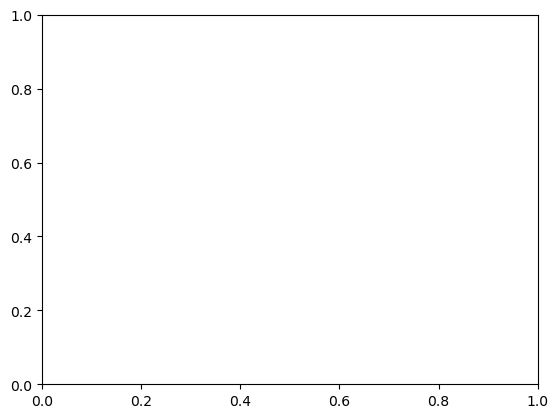

In [11]:
concat_bb.shape

plt.violinplot(concat_bb)
plt.xlabel("Concatenated Data")
plt.ylabel("Values")
plt.show()

In [ ]:
x = condition_and_consistencies[('glial', 'glial', 2, 1)]
max(np.nanmean(x, axis=(0, 1)))

5.547768568537618

In [ ]:
np.nanmean(np.nanmean(concat_gp, axis=(0, 1)))

0.6205373927253759

In [12]:
#np.nanmedian(bb_mean)

from scipy.stats import sem
bb_mean = np.nanmean(concat_bb, axis=(0, 1))
bb_sem = sem(bb_mean, nan_policy = 'omit')

gp_mean = np.nanmean(concat_gp, axis=(0, 1))
gp_sem = sem(gp_mean, nan_policy = 'omit')

wn_mean = np.nanmean(concat_wn, axis=(0, 1))
wn_sem = sem(wn_mean, nan_policy = 'omit')

avg_mean = np.nanmean(concat_avg, axis=(0, 1))
avg_sem = sem(avg_mean, nan_policy = 'omit')

print(bb_mean, bb_sem, gp_mean, gp_sem, wn_mean, wn_sem, avg_mean, avg_sem)

/tmp/ipykernel_2756785/4220028709.py:4: RuntimeWarning: Mean of empty slice
  bb_mean = np.nanmean(concat_bb, axis=(0, 1))


[-0.56526724 -0.31798272  0.17779035 ...  0.86392892  0.8384361
  0.9090446 ] 0.0011578082617805878 [0.72855435 0.63132218 0.86755096 ... 0.47660059 0.68488049 1.22566671] 0.0010960347798270283 [0.16923953 0.12741307 0.36903649 ... 0.07438253 0.40673222 0.49852066] 0.0008317424591386714 [ 0.94826033  0.47485525  0.88160535 ... -0.4434584  -0.44782726
 -0.37845626] 0.0011596330331563858


/tmp/ipykernel_2756785/4220028709.py:13: RuntimeWarning: Mean of empty slice
  avg_mean = np.nanmean(concat_avg, axis=(0, 1))


In [ ]:
all_means = [bb_mean, gp_mean, wn_mean, avg_mean]
for i, x in enumerate(all_means):
    all_means[i] = x[~np.isnan(x)]
    all_means[i] = np.clip(all_means[i], -1, 1)
    #all_means[i]=(all_means[i]-np.mean(all_means[i])) / (np.max(all_means[i]) - np.min(all_means[i]))
    #all_means[i] = (all_means[i] - np.min(all_means[i])) / np.std(all_means[i])



In [ ]:
a=(all_means[1]-np.min(all_means[1])) / (np.max(all_means[1]) - np.min(all_means[1]))
np.nanmean(a)

0.4864569461513893

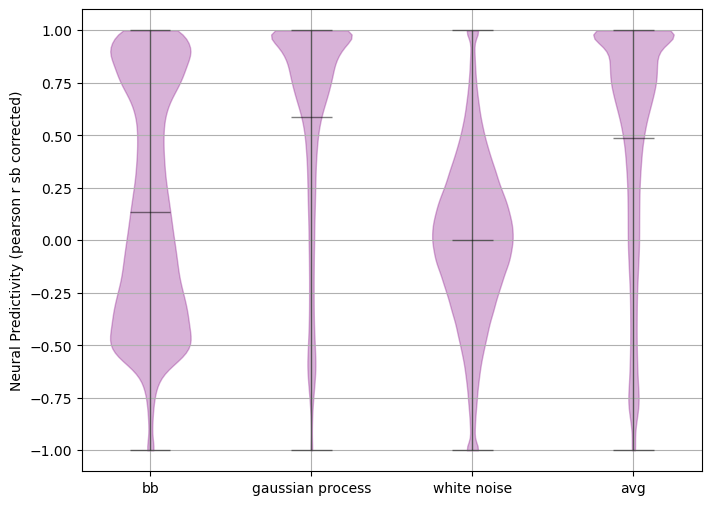

In [ ]:

fig, ax = plt.subplots(figsize=(8, 6))
parts = ax.violinplot(all_means, showmeans=True, showmedians=False)
for pc in parts['bodies']:
    pc.set_facecolor('purple')
    pc.set_edgecolor('purple')

for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = parts[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['bb', 'gaussian process', 'white noise', 'avg'])
ax.set_ylabel('Neural Predictivity (pearson r sb corrected)')
ax.grid(True)

# Plot the points on top of the violin plot
# for i, x in enumerate(all_means):
#     y = np.full_like(x, i+1)
#     ax.plot(y, x, 'o', markersize=1, alpha=0.5, color='purple')

plt.show()

In [14]:
results_arr = [np.nanmedian(wn_mean), np.nanmedian(gp_mean), np.nanmedian(bb_mean), np.nanmedian(avg_mean), -0.16074492]
#results_arr = [np.nanmean(wn_mean), np.nanmean(gp_mean), np.nanmean(bb_mean), np.nanmean(avg_mean), -0.16074492]

In [18]:
results_arr_copy = results_arr[:-1].copy()
results_arr_copy.sort()
results_arr_copy

[0.007926533728922092,
 0.031278767732905395,
 0.692505444024116,
 0.7824860108064271]

In [23]:
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

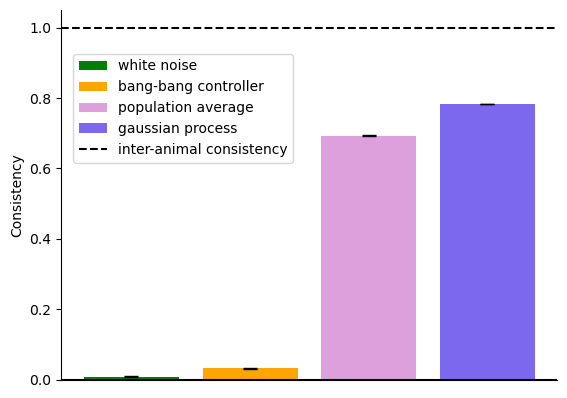

In [44]:
# Define the error values
error_values = [wn_sem, bb_sem, avg_sem, gp_sem]
bar_labels = ['white noise', 'bang-bang controller', 'population average', 'gaussian process']
bar_colors = ['green', 'orange', 'plum', 'mediumslateblue']

# Create the bar plot with error bars
bars = plt.bar(range(len(results_arr_copy)), results_arr_copy, color=bar_colors, yerr=error_values, capsize=5)
plt.axhline(0, color='black')
dashed_line = plt.axhline(1, linestyle='--', color='black', label='inter-animal consistency')

# Add legend for bars and dashed line
plt.legend(handles=[bars[i] for i in range(len(bars))] + [dashed_line], labels=bar_labels + ['inter-animal consistency'], loc='upper left', bbox_to_anchor=(0.01, 0.9))

plt.xticks([])  # Remove x-axis labels
plt.ylabel("Consistency")

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()